In [ ]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import base64
import psycopg2
import re
import spacy
import nltk
import numexpr
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
%matplotlib inline

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

!pip install -U pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# **Create dataframe for each individual json file**

In [32]:
amzn = pd.read_json('Amazon-Brand-Food-Chicken-Brown2021-12-16 07_13_59Z.json')
bb_adult = pd.read_json('Blue-Buffalo-Protection-Formula-Adult2021-12-16 06_50_00Z.json')
bb_small = pd.read_json('Blue-Buffalo-Protection-Formula-Small2021-12-16 07_43_51Z.json')
bb_wild = pd.read_json('Blue-Buffalo-Wilderness-Protein-Natural2021-12-16 07_40_29Z.json')
canine = pd.read_json('CANINE-CUISINE-Poultry-Variety-3-5-oz2021-12-16 07_19_58Z.json')
ceasar = pd.read_json('CESAR-DELIGHTS-Classic-Sauce-Variety2021-12-16 08_04_06Z.json')
hills = pd.read_json('HillS-Science-Diet-Adult-Recipe2021-12-16 07_37_45Z.json')
iams = pd.read_json('Iams-Proactive-Health-Minichunks-Chicken2021-12-16 08_10_15Z.json')
nb = pd.read_json('Natural-Balance-Limited-Ingredient-Formula2021-12-16 08_11_35Z.json')
nr = pd.read_json('NatureS-Recipe-Grain-Free-Food2021-12-16 07_50_13Z.json')
ped_v = pd.read_json('PEDIGREE-Variety-Hickory-Chicken-Vegetables2021-12-16 07_54_13Z.json')
ped_c = pd.read_json('Pedigree-Complete-Nutrition-Grilled-Vegetable2021-12-16 07_01_33Z.json')
ped_c2 = pd.read_json('Pedigree-Complete-Nutrition-Grilled-Vegetable2021-12-16 07_58_03Z.json')
ped_c3 = pd.read_json('Pedigree-Complete-Nutrition-Roasted-Vegetable2021-12-16 06_53_04Z.json')
purina_b = pd.read_json('Purina-Beneful-Variety-IncrediBites-Chicken2021-12-16 07_23_09Z.json')
purina_p = pd.read_json('Purina-Pro-Plan-Shredded-Chicken2021-12-16 08_01_45Z.json')
purina_s = pd.read_json('Purina-Smartblend-Natural-Chicken-Formula2021-12-16 06_57_23Z.json')
rr = pd.read_json('Rachael-Ray-Nutrish-Natural-Recipe2021-12-16 07_33_35Z.json')
rr_v = pd.read_json('Rachael-Ray-Nutrish-Variety-Ounce2021-12-16 07_46_54Z.json')
sch = pd.read_json('Science-Diet-Chicken-Barley-Recipe2021-12-16 08_13_02Z.json')
ss = pd.read_json('Science-Diet-Sensitive-Stomach-Chicken2021-12-16 07_30_01Z.json')
taste = pd.read_json('Taste-Wild-Protein-Prairie-Premium2021-12-16 07_28_14Z.json')

# **Create a column with calculating the total words**

In [44]:
#create a column with total words
amzn['total_words'] = amzn['body'].str.split().str.len()
bb_adult['total_words'] = bb_adult['body'].str.split().str.len()
bb_small['total_words'] = bb_small['body'].str.split().str.len()
bb_wild['total_words'] = bb_wild['body'].str.split().str.len()
canine['total_words'] = canine['body'].str.split().str.len()
ceasar['total_words'] = ceasar['body'].str.split().str.len()
hills['total_words'] = hills['body'].str.split().str.len()
iams['total_words'] = iams['body'].str.split().str.len()
nb['total_words'] = nb['body'].str.split().str.len()
nr['total_words'] = nr['body'].str.split().str.len()
ped_v['total_words'] = ped_v['body'].str.split().str.len()
ped_c['total_words'] = ped_c['body'].str.split().str.len()
ped_c2['total_words'] = ped_c2['body'].str.split().str.len()
ped_c3['total_words'] = ped_c3['body'].str.split().str.len()
purina_b['total_words'] = purina_b['body'].str.split().str.len()
purina_p['total_words'] = purina_p['body'].str.split().str.len()
purina_s['total_words'] = purina_s['body'].str.split().str.len()
rr['total_words'] = rr['body'].str.split().str.len()
rr_v['total_words'] = rr_v['body'].str.split().str.len()
sch['total_words'] = sch['body'].str.split().str.len()
ss['total_words'] = ss['body'].str.split().str.len()
taste['total_words'] = taste['body'].str.split().str.len()

# **Create a column calculating the total characters excluding the space**

In [46]:
#create a colum with total characters 
amzn['total_char'] = amzn['body'].map(lambda calc: (len(calc) - calc.count(" ")))
bb_adult['total_char'] = bb_adult['body'].map(lambda calc: (len(calc) - calc.count(" ")))
bb_small['total_char'] = bb_small['body'].map(lambda calc: (len(calc) - calc.count(" ")))
bb_wild['total_char'] = bb_wild['body'].map(lambda calc: (len(calc) - calc.count(" ")))
canine['total_char'] = canine['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ceasar['total_char'] = ceasar['body'].map(lambda calc: (len(calc) - calc.count(" ")))
hills['total_char'] = hills['body'].map(lambda calc: (len(calc) - calc.count(" ")))
iams['total_char'] = iams['body'].map(lambda calc: (len(calc) - calc.count(" ")))
nb['total_char'] = nb['body'].map(lambda calc: (len(calc) - calc.count(" ")))
nr['total_char'] = nr['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ped_v['total_char'] = ped_v['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ped_c['total_char'] = ped_c['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ped_c2['total_char'] = ped_c2['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ped_c3['total_char'] = ped_c3['body'].map(lambda calc: (len(calc) - calc.count(" ")))
purina_b['total_char'] = purina_b['body'].map(lambda calc: (len(calc) - calc.count(" ")))
purina_p['total_char'] = purina_p['body'].map(lambda calc: (len(calc) - calc.count(" ")))
purina_s['total_char'] = purina_s['body'].map(lambda calc: (len(calc) - calc.count(" ")))
rr['total_char'] = rr['body'].map(lambda calc: (len(calc) - calc.count(" ")))
rr_v['total_char'] = rr_v['body'].map(lambda calc: (len(calc) - calc.count(" ")))
sch['total_char'] = sch['body'].map(lambda calc: (len(calc) - calc.count(" ")))
ss['total_char'] = ss['body'].map(lambda calc: (len(calc) - calc.count(" ")))
taste['total_char'] = taste['body'].map(lambda calc: (len(calc) - calc.count(" ")))

# **Create a column eliminating the stopwords in body part**

In [80]:
#created a column with stopwords eliminated body
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

amzn['stopwords_removed_body'] = amzn['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bb_adult['stopwords_removed_body'] = bb_adult['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bb_small['stopwords_removed_body'] = bb_small['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bb_wild['stopwords_removed_body'] = bb_wild['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
canine['stopwords_removed_body'] = canine['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ceasar['stopwords_removed_body'] = ceasar['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
hills['stopwords_removed_body'] = hills['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
iams['stopwords_removed_body'] = iams['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
nb['stopwords_removed_body'] = nb['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
nr['stopwords_removed_body'] = nr['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ped_v['stopwords_removed_body'] = ped_v['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ped_c['stopwords_removed_body'] = ped_c['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ped_c2['stopwords_removed_body'] = ped_c2['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ped_c3['stopwords_removed_body'] = ped_c3['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
purina_b['stopwords_removed_body'] = purina_b['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
purina_p['stopwords_removed_body'] = purina_p['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
purina_s['stopwords_removed_body'] = purina_s['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rr['stopwords_removed_body'] = rr['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rr_v['stopwords_removed_body'] = rr_v['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
sch['stopwords_removed_body'] = sch['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ss['stopwords_removed_body'] = ss['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
taste['stopwords_removed_body'] = taste['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Get the top common words**
Analyzed only for amzn dataframe.

In [92]:
#20 most common words for Amzn dataframe 
Counter(" ".join(amzn['stopwords_removed_body']).split()).most_common(20)

[('I', 854),
 ('dog', 734),
 ('food', 577),
 ('dogs', 372),
 ('My', 359),
 ('like', 271),
 ('food.', 217),
 ('eat', 193),
 ('it.', 186),
 ('The', 177),
 ('good', 148),
 ('love', 132),
 ('ingredients', 124),
 ('Dog', 118),
 ('loves', 100),
 ('Wag', 98),
 ('would', 96),
 ('bag', 95),
 ('quality', 94),
 ('really', 93)]

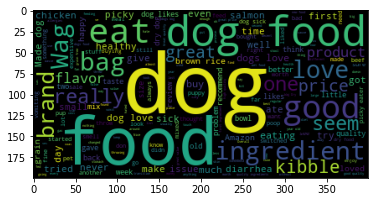

In [75]:
#generate a simple wordcloud for top words 
wordcloud = WordCloud().generate(' '.join(amzn['stopwords_removed_body']))
plt.imshow(wordcloud)

(-0.5, 2999.5, 1999.5, -0.5)

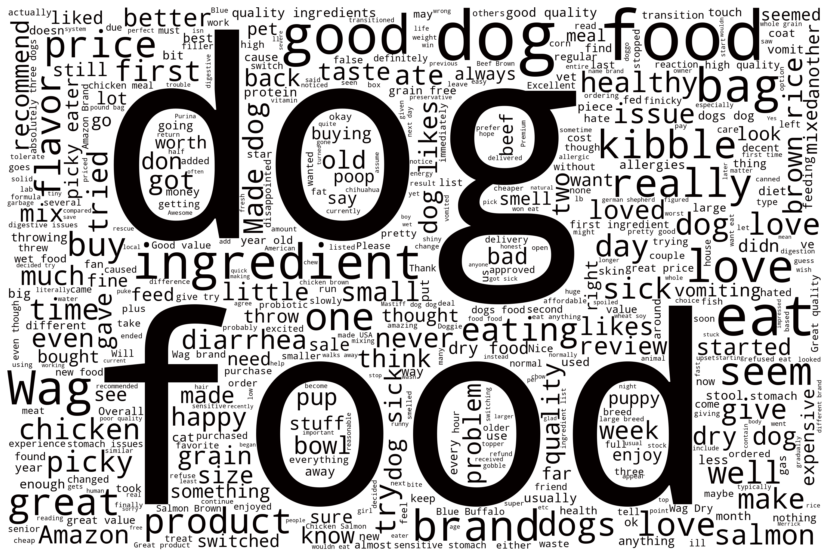

In [78]:
#generate a wordcloud that encapsulates more from the column
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(' '.join(amzn['stopwords_removed_body']))

wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# save the image
# plt.savefig('biden_wc.png')

# **Topic Modeling with LDA Model**

In [94]:
#Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(amzn['stopwords_removed_body']))

pprint(data_words[:1])

[['dog',
  'vomit',
  'like',
  'others',
  'dog',
  'food',
  'doesn',
  'settle',
  'well',
  'dog',
  'vomiting',
  'immediately',
  'consumption',
  'would',
  'recommend']]


In [95]:
# Build the bigram and trigram models
bigram_disc = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_disc = gensim.models.Phrases(bigram_disc[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_disc_mod = gensim.models.phrases.Phraser(bigram_disc)
trigram_disc_mod = gensim.models.phrases.Phraser(trigram_disc)

# See trigram example
print(trigram_disc_mod[bigram_disc_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['dog', 'vomit', 'like', 'others', 'dog', 'food', 'doesn', 'settle', 'well', 'dog', 'vomiting', 'immediately', 'consumption', 'would', 'recommend']


In [98]:
# Define functions for bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, trigram_mod, bigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
stop_words = stopwords.words('english')
data_disc_nostops = remove_stopwords(data_words)

# Form Bigrams
data_disc_bigrams = make_bigrams(data_disc_nostops, bigram_disc)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_disc_lemmatized = lemmatization(data_disc_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

pprint(data_disc_lemmatized[:1])

In [101]:
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.
# Create Dictionary
id2word_disc = corpora.Dictionary(data_disc_lemmatized)

# Create Corpus
texts_disc = data_disc_lemmatized

# Term Document Frequency
corpus_disc = [id2word_disc.doc2bow(text) for text in texts_disc]

# View
print(corpus_disc[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1)]]


In [102]:
#Term frequency of the topics
[[(id2word_disc[id], freq) for id, freq in cp] for cp in corpus_disc[:1]]

[[('consumption', 1),
  ('dog', 3),
  ('food', 1),
  ('immediately', 1),
  ('other', 1),
  ('recommend', 1),
  ('settle', 1),
  ('vomit', 2),
  ('well', 1),
  ('would', 1)]]

In [108]:
!pip install pandas --upgrade

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_disc,
                                           id2word=id2word_disc,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
#Visualize the topics
pyLDAvis.enable_notebook()
vis_disc = gensimvis.prepare(lda_model, corpus_disc, id2word_disc)
vis_disc

# **Topic Modeling with BERTopic**

In [ ]:
pip install bertopic

In [ ]:
pip install bertopic[visualization]

In [115]:
titles = amzn['stopwords_removed_body'].to_list()

In [119]:
pip install --upgrade numpy

In [122]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.21.4
Uninstalling numpy-1.21.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.4
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires pandas~=

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=20, n_gram_range=(1,3), verbose=True)
topics, _ = topic_model.fit_transform(titles)